In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from os import chdir,getcwd

In [2]:
url = "https://raw.githubusercontent.com/MichauJ/Learning-ML/refs/heads/main/Data/adult.csv"

In [3]:
census = pd.read_csv(url,na_values="?")


In [4]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
census.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K


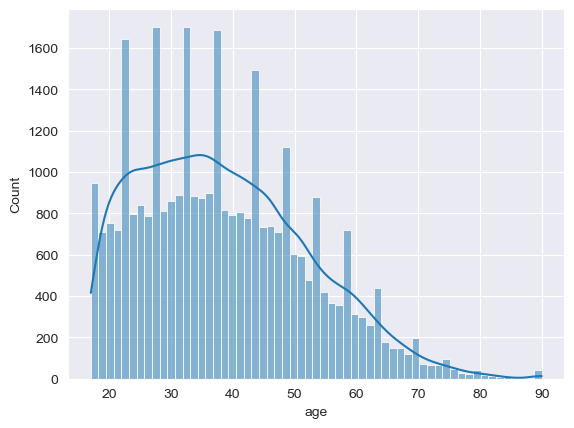

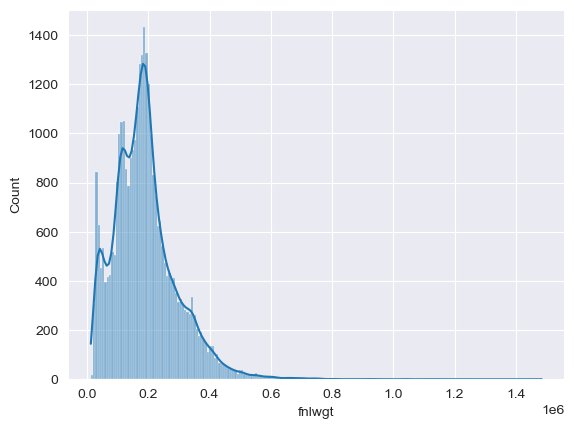

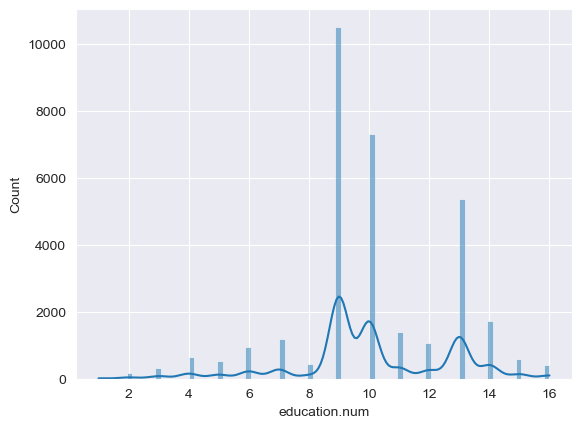

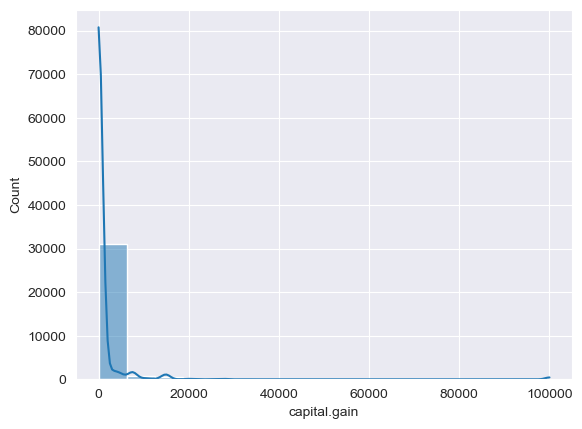

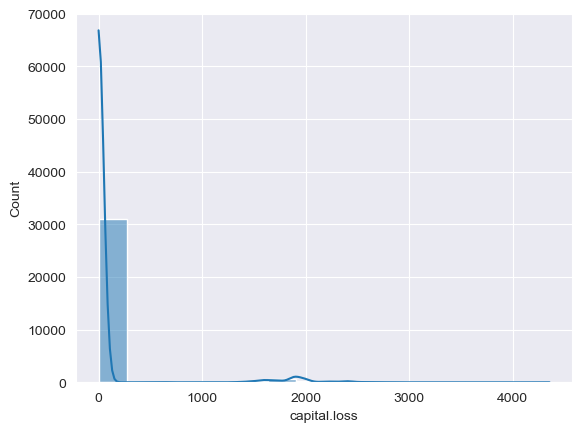

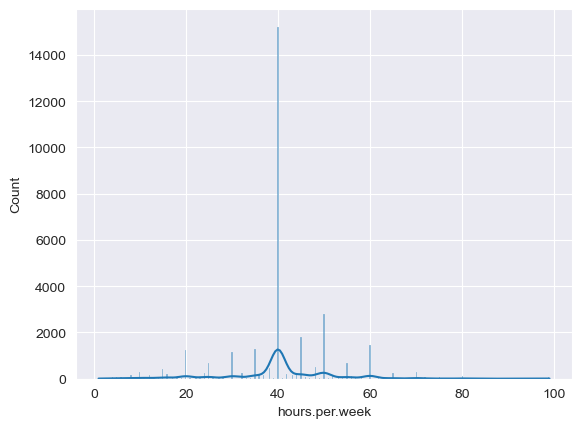

In [6]:
# summary of numerical variables
numeric_columns = ["age", "fnlwgt", "education.num", "capital.gain", "capital.loss", "hours.per.week"]
for col in numeric_columns:
    #print(f"Summary of {col}:")
    #print(census[col].describe())
    #print(census[col].value_counts())
    plt.figure()
    sns.histplot(census[col], kde=True)
    plt.show()

In [7]:
# summary of categorical variables
categorical_columns = ["workclass", "education", "marital.status", "occupation", "relationship", "race", "sex", "native.country", "income"]
for col in categorical_columns:
    print(f"====Value counts for {col}====")
    print(census[col].value_counts())

====Value counts for workclass====
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
====Value counts for education====
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
====Value counts for marital.status====
marital.status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64


In [8]:
# checking missing values
print("Missing values count:")
print(census.isnull().sum())

Missing values count:
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


In [9]:
# cleaning data
census.dropna(inplace=True)
print(f"Dataset after cleaning: {census.shape}")

Dataset after cleaning: (30162, 15)


In [10]:
# grouping countries
census["native.country"] = census["native.country"].apply(lambda x: x if x == "United-States" else "Other")
print(census["native.country"].value_counts())

native.country
United-States    27504
Other             2658
Name: count, dtype: int64


In [11]:
# choosing variables to the model
census2 = census[["age", "workclass", "marital.status", "education.num", "occupation", "hours.per.week", "income"]]

In [12]:
# converting categorical variables
census2 = pd.get_dummies(census2, drop_first=True)

In [13]:
# Spliting dataset to train and test
X = census2.drop(columns=["income_>50K"])
y = census2["income_>50K"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# function to calculate metrics
def get_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    metrics = {
        "Sensitivity": recall_score(y_true, y_pred),
        "Specificity": tn / (tn + fp),
        "Pos Pred Value": precision_score(y_true, y_pred),
        "Neg Pred Value": tn / (tn + fn),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred),
        "Prevalence": np.mean(y_true),
        "Detection Rate": tp / len(y_true),
        "Detection Prevalence": (tp + fp) / len(y_true),
        "Balanced Accuracy": accuracy_score(y_true, y_pred)
    }
    return metrics

In [15]:
# Model 1: Logistic regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred1 = log_model.predict(X_test)
print("Logistic Regression Model:")
print(classification_report(y_test, y_pred1))

Logistic Regression Model:
              precision    recall  f1-score   support

       False       0.86      0.91      0.88      4533
        True       0.67      0.54      0.60      1500

    accuracy                           0.82      6033
   macro avg       0.76      0.73      0.74      6033
weighted avg       0.81      0.82      0.81      6033



In [16]:
# Model 2: Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred2 = dt_model.predict(X_test)
print("Decision Tree Model:")
print(classification_report(y_test, y_pred2))

Decision Tree Model:
              precision    recall  f1-score   support

       False       0.85      0.87      0.86      4533
        True       0.57      0.53      0.55      1500

    accuracy                           0.79      6033
   macro avg       0.71      0.70      0.71      6033
weighted avg       0.78      0.79      0.78      6033



In [17]:
# Model 3: Random Forest
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)
y_pred3 = rf_model.predict(X_test)
print("Random Forest Model:")
print(classification_report(y_test, y_pred3))

Random Forest Model:
              precision    recall  f1-score   support

       False       0.86      0.90      0.88      4533
        True       0.65      0.54      0.59      1500

    accuracy                           0.81      6033
   macro avg       0.75      0.72      0.73      6033
weighted avg       0.80      0.81      0.81      6033



In [18]:
# Results
results = pd.DataFrame({
    "Logistic Regression": precision_score(y_test, y_pred1),
    "Decision Tree": precision_score(y_test, y_pred2),
    "Random Forest": precision_score(y_test, y_pred3)
}, index=["Precision"])
print(results)

           Logistic Regression  Decision Tree  Random Forest
Precision              0.67052       0.574946       0.648089


In [19]:
# Cofusion matrix
matrix_03 = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix - Random Forest:")
cm = pd.DataFrame(matrix_03,index = ["N","P"],columns = ["N","P"])
print(cm)

Confusion Matrix - Random Forest:
      N    P
N  4091  442
P   686  814


In [20]:
# Model 4: Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=500, random_state=42)
gb_model.fit(X_train, y_train)
y_pred4 = gb_model.predict(X_test)
print("Gradient Boosting Model:")
print(classification_report(y_test, y_pred4))

Gradient Boosting Model:
              precision    recall  f1-score   support

       False       0.87      0.91      0.89      4533
        True       0.69      0.59      0.64      1500

    accuracy                           0.83      6033
   macro avg       0.78      0.75      0.76      6033
weighted avg       0.83      0.83      0.83      6033



In [21]:
matrix_04 = confusion_matrix(y_test, y_pred4)
print("Confusion Matrix - Gradient Boosting:")
print(matrix_04)

Confusion Matrix - Gradient Boosting:
[[4142  391]
 [ 615  885]]


In [22]:
results_dict = {
    "Logistic Regression": get_metrics(y_test, y_pred1),
    "Decision Tree": get_metrics(y_test, y_pred2),
    "Random Forest": get_metrics(y_test, y_pred3),
    "Gradient Boosting": get_metrics(y_test, y_pred4)
}
results_df = pd.DataFrame(results_dict)
results_df

,Logistic Regression,Decision Tree,Random Forest,Gradient Boosting
Sensitivity,0.541333,0.529333,0.542667,0.590000
Specificity,0.911979,0.870505,0.902493,0.913744
Pos Pred Value,0.670520,0.574946,0.648089,0.693574
Neg Pred Value,0.857321,0.848237,0.856395,0.870717
Precision,0.670520,0.574946,0.648089,0.693574
Recall,0.541333,0.529333,0.542667,0.590000
F1,0.599041,0.551198,0.590711,0.637608
Prevalence,0.248633,0.248633,0.248633,0.248633
Detection Rate,0.134593,0.131609,0.134925,0.146693
Detection Prevalence,0.200729,0.228908,0.208188,0.211503
